# Study on Large Scale Fish Dataset

A Large Scale Fish Dataset, deniz yaşamını incelemek ve sınıflandırmak amacıyla oluşturulmuş kapsamlı bir veri setidir. İzmir Ekonomi Üniversitesi'nin üniversite-sanayi iş birliği projesi kapsamında İzmir'deki bir süpermarketten toplanan 9 farklı deniz ürünü türünü içermektedir ve bu çalışma
ASYU 2020'de yayınlanmıştır.

Veri seti; çipura, mercan, levrek, barbunya, istavrit,
karadeniz çaçası, çizgili barbunya, alabalık, karides görüntü örneklerini içermektedir.

İşte bu veri setinin genel özellikleri ve içeriği hakkında bir özet:

**Veri Setinin Özellikleri**

**Amaç:**
Veri seti, farklı balık türlerini sınıflandırmak için kullanılır. Görüntü işleme ve derin öğrenme teknikleriyle, balıkların tanınması ve sınıflandırılması amacıyla tasarlanmıştır.

**Görüntü Sayısı:**
Veri seti, çeşitli balık türlerinin birçok görüntüsünü içerir. Bu sayede, modelin farklı açılardan ve koşullardan gelen balık görüntülerini öğrenmesi sağlanır.

**Sınıf Sayısı:**
Veri seti, genellikle 9 farklı balık türünü içerir. Her bir sınıf, belirli bir balık türünü temsil eder.

**Görüntü Boyutu:**
Görüntüler genellikle 225x225 piksel boyutunda olup, model eğitiminde kullanılmak üzere önceden boyutlandırılmıştır.

**Veri Ön İşleme:**
Görüntüler, normalizasyon ve veri artırma (data augmentation) teknikleriyle işlenmiştir. Bu, modelin genel performansını artırmak için önemlidir.
Normalizasyon, piksel değerlerinin 0-1 aralığına dönüştürülmesi anlamına gelir.

**Etiketleme:**
Her görüntü, ilgili balık türü ile etiketlenmiştir. Bu etiketler, modelin öğrenme sürecinde doğru sınıflandırma yapabilmesi için kullanılır.

**Kullanım Alanları:**
Bu veri seti, derin öğrenme algoritmaları, özellikle konvolüsyonel sinir ağları (CNN) gibi görüntü işleme modelleri için uygundur. Aynı zamanda balıkların korunması, ekosistem yönetimi ve deniz biyolojisi alanlarında da kullanılabilir.

**Özet**
A Large Scale Fish Dataset, derin öğrenme ve görüntü işleme teknikleri ile balık türlerini sınıflandırmak için tasarlanmış zengin ve kapsamlı bir veri setidir. Görüntülerin yüksek sayıda ve çeşitliliğe sahip olması, modelin genel öğrenme yeteneğini artırırken, balıkların korunması ve ekosistem yönetimi gibi önemli alanlarda uygulanabilirlik sağlar. Bu veri seti, araştırmacılar ve geliştiriciler için etkili bir kaynak sunmaktadır.

# 1. Görüntülerin Yüklenmesi ve İşlenmesi 

Görüntüleri klasörlerden yükleyip boyutlandırıyoruz ve her görüntüyü normalize ederek images listesine ekliyoruz. Etiketler de labels listesine ekleniyor.

In [12]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Veri setinin bulunduğu dizin
main_directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Görüntüleri ve etiketleri saklamak için listeler
images = []
labels = []

# Görüntüleri yükleyip boyutlandırma (225x225) ve etiketleri toplama
for directory in tqdm(os.listdir(main_directory)):
    next_directory = os.path.join(main_directory, directory)
    
    # README veya benzeri dosyalar varsa atla
    if directory in ["README.txt", "license.txt", "Segmentation_example_script.m"]:
        continue
    
    for images_directory in os.listdir(next_directory):
        if "GT" not in images_directory:  # Ground truth olmayan dizinleri al
            final_directory = os.path.join(next_directory, images_directory)
            for image in os.listdir(final_directory):
                img_path = os.path.join(final_directory, image)
                
                # Görüntüyü aç ve boyutlandır
                with Image.open(img_path) as img:
                    img = img.resize((225, 225))  # Görüntü boyutlandırma
                    img_array = np.asarray(img).astype('float32') / 255  # Normalize et
                    images.append(img_array)
                    labels.append(images_directory)  # Etiket


100%|██████████| 12/12 [02:27<00:00, 12.27s/it]


# 2. Eğitim, Doğrulama ve Test Setlerine Ayırma

Görüntüleri eğitim (%80), doğrulama (%10), ve test (%10) setlerine bölüyoruz.

In [13]:
from sklearn.model_selection import train_test_split

# Görüntüleri ve etiketleri numpy dizisine dönüştür
images = np.array(images)
labels = np.array(labels)

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)

# Test setinin yarısını doğrulama seti olarak ayır
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Doğrulama seti boyutu: {X_val.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Eğitim seti boyutu: (7200, 225, 225, 3)
Doğrulama seti boyutu: (900, 225, 225, 3)
Test seti boyutu: (900, 225, 225, 3)


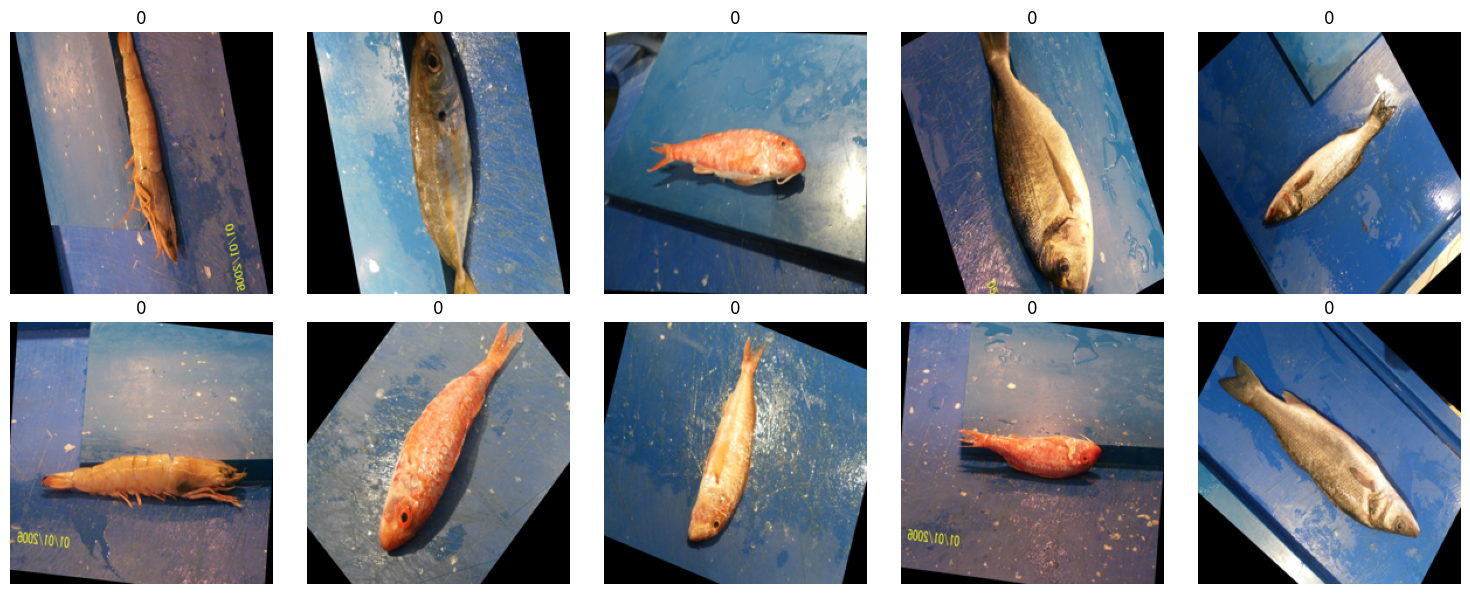

In [14]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Eğitim setinden örnek görüntüler
plot_sample_images(X_train, np.array([np.argmax(label) for label in y_train]), num_samples=10)

# 3. One-Hot Encoding ile Etiketlerin Dönüştürülmesi

 Etiketler OneHotEncoder ile one-hot encoding formatına dönüştürülüyor. Bu, sınıfların makine öğrenmesi algoritmaları tarafından işlenebilir hale gelmesini sağlar.

In [15]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding işlemi
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

print(y_train[:5])  # İlk 5 etiketi kontrol et


[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 4. Veri Artırma (Data Augmentation)

Görüntüleri döndürme, kaydırma ve parlaklık artırma gibi işlemlerle veri setine çeşitlilik kazandırıyoruz. Bu, modelin genelleme yeteneğini artırır.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma işlemi
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizasyon
    rotation_range=30,  # Görüntü döndürme
    width_shift_range=0.3,  # Genişlik kaydırma
    height_shift_range=0.3,  # Yükseklik kaydırma
    shear_range=0.3,  # Kesme
    zoom_range=0.3,  # Zoom
    brightness_range=[0.8, 1.2],  # Parlaklık artırma
    horizontal_flip=True,  # Yatay çevirme
    fill_mode='nearest'
)

# Eğitim verisi üzerinde veri artırma işlemi
datagen.fit(X_train)


# 5. Model Tanımlama ve Derleme

Derin öğrenme modeli tanımlanıyor. 3 gizli katman ve softmax çıktı katmanı var. Adam optimizasyonu ile model derleniyor.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [18]:
# Derin öğrenme modeli
model = Sequential([
    # Giriş katmanı
    Input(shape=(225, 225, 3)),
    
    # Gizli katmanlar
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout %30
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    # Çıkış katmanı
    Dense(9, activation='softmax')  # 9 sınıf için softmax
])

# Modelin derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)  # Daha düşük öğrenme oranı
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özetini görselleştirme
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 151875)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    77,760,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,925,897 (297.26 MB)

 Trainable params: 77,925,897 (297.26 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Modelin Eğitilmesi ve Eğitim Sonuçlarının Görselleştirilmesi

* Model, 20 epochs boyunca eğitiliyor. Doğrulama kaybı izleniyor ve doğrulama kaybı 7 epochs boyunca iyileşme göstermediğinde eğitim erken durduruluyor.

* Modelin eğitim ve doğrulama doğruluğu ve kayıpları grafik olarak gösteriliyor.

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 213s 943ms/step - accuracy: 0.1844 - loss: 2.0896 - val_accuracy: 0.2644 - val_loss: 1.8992
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 200s 890ms/step - accuracy: 0.2260 - loss: 1.9523 - val_accuracy: 0.3422 - val_loss: 1.8037
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 203s 904ms/step - accuracy: 0.2875 - loss: 1.8620 - val_accuracy: 0.4144 - val_loss: 1.6360
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 201s 895ms/step - accuracy: 0.3082 - loss: 1.7964 - val_accuracy: 0.4478 - val_loss: 1.5907
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 200s 889ms/step - accuracy: 0.3672 - loss: 1.7133 - val_accuracy: 0.4878 - val_loss: 1.4932
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 203s 904ms/step - accuracy: 0.3744 - loss: 1.6756 - val_accuracy: 0.4767 - val_loss: 1.4254
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 211s 939ms/step - accuracy: 0.4045 - loss: 1.6301 - val_accuracy: 0.5078 - val_loss: 1.4268
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 205s 912ms/step - accuracy: 0.4158 -

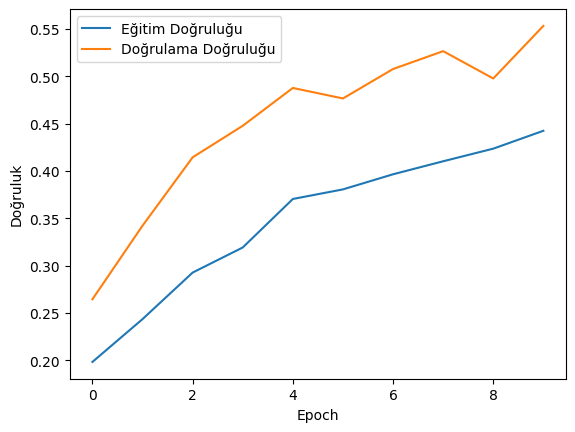

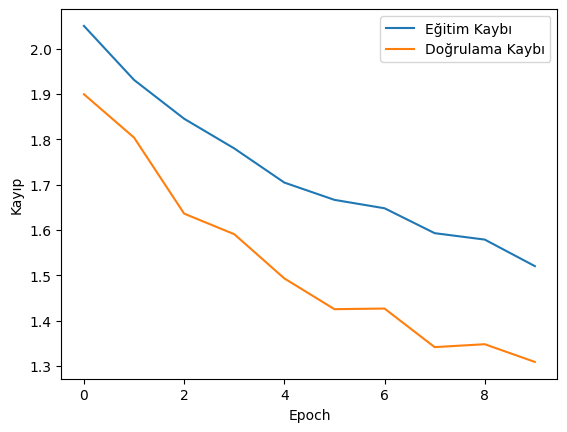

In [20]:
# Modelin eğitilmesi
results = model.fit(
    X_train, y_train,
    batch_size=32,  # Batch size azaltıldı
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
)

import matplotlib.pyplot as plt
# Eğitim ve doğrulama doğruluğu grafiği
plt.plot(results.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(results.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıp fonksiyonu grafiği
plt.plot(results.history['loss'], label='Eğitim Kaybı')
plt.plot(results.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# 7. Modelin Test Setinde Değerlendirilmesi ve Sınıflandırma Raporu ve Confusion Matrix

* Model, test seti üzerinde değerlendirilerek doğruluk ve kayıp hesaplanıyor.

* Modelin test seti üzerindeki performansı sınıflandırma raporu ile analiz ediliyor ve sonuçlar confusion matrix ile görselleştiriliyor.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


29/29 - 2s - 83ms/step - accuracy: 0.5789 - loss: 1.3091
Test accuracy: 0.5788888931274414
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.64      0.16      0.26       100
           2       0.85      0.82      0.84       106
           3       0.63      0.95      0.76        85
           4       0.70      0.85      0.77        99
           5       0.30      0.76      0.43        97
           6       0.76      0.89      0.82       106
           7       0.50      0.05      0.09       116
           8       0.56      0.76      0.65       104

    accuracy                           0.58       900
   macro avg       0.55      0.58      0.51       900
weighted avg       0.56      0.58      0.51       900



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


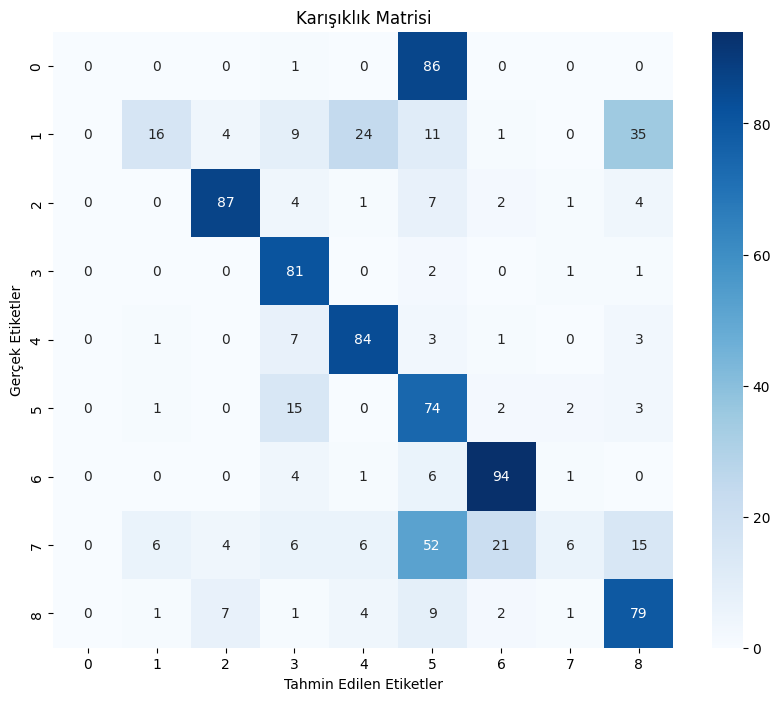

In [23]:
# Test seti üzerinde değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Confusion Matrix ve Classification Report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Sınıflandırma raporu
print(classification_report(y_true_labels, y_pred_labels))

# Confusion matrix görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()

Bu sonuçları özetleyerek değerlendirelim:

**1. Test Doğruluğu (Accuracy):**

Modelin test doğruluğu yaklaşık %57.9 (Test accuracy: 0.5789).

**2. Confusion Matrix (Karışıklık Matrisi) ve Sınıflandırma Raporu:**
Precision (kesinlik), recall (duyarlılık) ve f1-score gibi metrikler incelendiğinde, sınıflar arasında önemli farklılıklar görülüyor. Bazı sınıflar iyi performans gösterirken, bazıları oldukça düşük performans sergiliyor.

**İyi Performans Gösteren Sınıflar:**

Sınıf 2: Precision: 0.85, Recall: 0.82, F1-Score: 0.84
Sınıf 3: Precision: 0.63, Recall: 0.95, F1-Score: 0.76
Sınıf 6: Precision: 0.76, Recall: 0.89, F1-Score: 0.82
Bu sınıflar, model tarafından nispeten daha iyi sınıflandırılmış durumda.


**3. Genel Performans Değerlendirmesi:**
Genel doğruluk (%57.9) düşük. Özellikle sınıflar arasında büyük dengesizlikler var. Bazı sınıflar çok iyi performans sergilerken (örneğin, Sınıf 2, Sınıf 6), diğerleri (Sınıf 0, Sınıf 1, Sınıf 7) kötü performans sergiliyor.

**Macro Avg (Makro Ortalama):** Precision, recall ve F1-score ortalama değerleri sırasıyla 0.55, 0.58 ve 0.51. Bu, modelin genel olarak tüm sınıflar arasında eşit performans göstermediğini, bazı sınıflarda aşırı başarılı iken bazılarında başarısız olduğunu gösteriyor.

**Weighted Avg (Ağırlıklı Ortalama):** Precision, recall ve f1-score, tüm sınıfların örnek sayısına göre ağırlıklandırılmış. Ağırlıklı ortalama da genel performansın dengeli olmadığını gösteriyor (tüm sınıflar için ortalama f1-score 0.51).

**4. Sonuç:**
Model, bazı sınıflarda iyi performans göstermekte ancak genel performans dengesiz ve bazı sınıflarda modelin performansı oldukça düşük.
Sınıf dengesizliği veya daha fazla veri artırma teknikleri ile modelin iyileştirilmesi gerekebilir. Özellikle zayıf performans gösteren sınıflar için daha hedefli iyileştirme yapılabilir.